# 퍼셉트론
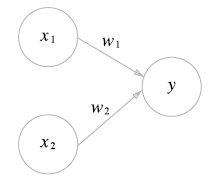
- 퍼셉트론 알고리즘은 여러 개의 신호를 입력으로 받아 하나의 신호를 출력합니다.
- 퍼셉트론은 x와 가중치 w를 곱한 값을 모두 더하여 하나의 값(y)으로 만들어 냅니다. 
- 이때, 활성화 함수를 통해 임곗값(threshold)와 비교하여 출력값을 반환합니다.
  - 활성화함수란? 신경망에서 만들어진 값을 적절할 출력값으로 변환해주는 함수
- 최종 결과값과 우리가 정해놓은 정답과 비교하는데, 특정 알고리즘을 사용하여 최적의 값을 찾을 때까지 가중치를 업데이트하면서 학습을 반복합니다.


## 단층 퍼셉트론

### OR gate

In [10]:
import tensorflow as tf
tf.random.set_seed(777)
# set_seed() : 고정된 시드값을 설정하는 함수로, 실행할 때마다 같은 결과값을 얻기 위해 사용
# 실험에서 재생산성을 위한 중요한 설정 중 하나

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse  

In [11]:
# dataset
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

In [12]:
# Build Model
model = Sequential()

# 단층 퍼셉트론 구성
# Dense층은 퍼셉트론을 자동으로 생성해 줍니다.
# 두 개의 특성을 가지는 1차원의 데이터를 입력으로 받고, 한 개의 출력을 가지는 Dense층(퍼셉트론의 갯수 1)
model.add(Dense(1, input_shape=(2,), activation='linear')) 

# 모델 준비
model.compile(optimizer=SGD(), loss=mse, metrics=['acc'])

# 모델 학습
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 294ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9

In [13]:
# Get Weigth
# weigits와 bias를 반환
model.get_weights()

[array([[0.49431452],
        [0.37552655]], dtype=float32), array([0.3271933], dtype=float32)]

## 다층 퍼셉트론

### XOR gate
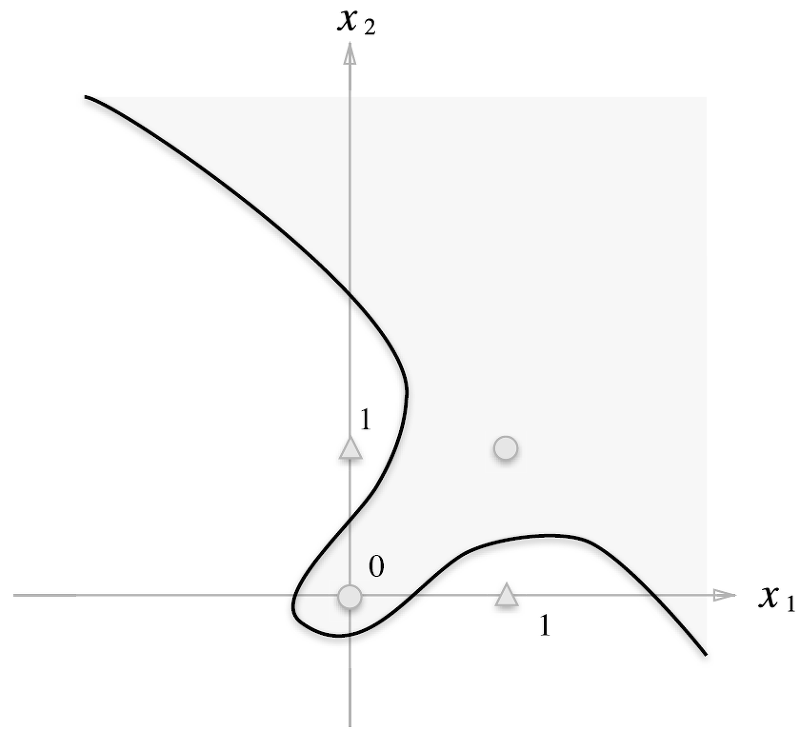
- 단층 퍼셉트론의 한계점은 위 그림과 같이 동그라미와 세모를 구분하는 XOR gate를 해결할 수 없다는 것입니다.
- 이를 다층 퍼셉트론으로 해결할 수 있습니다
  - 여러개의 퍼셉트론을 쌓게 되면 더 많은 가중치를 다뤄야합니다.
  - 퍼셉트론에서 결과값은 입력값과 가중치를 곱해서 다 더한 것이라 했는데, 실제학습에서는 좀 더 단순하고 효율적인 계산을 위해 벡터화를 이용하여 내적을 통해 연산합니다.

In [14]:
# 벡터 내적
x = tf.random.uniform((10,5)) # uniform 분포에서 해당 크기만큼의 난수 생성
w = tf.random.uniform((5,3))
d = tf.matmul(x,w) # 내적

print(f'x와 w의 벡터 내적의 결과 크기 : {d.shape}')

x와 w의 벡터 내적의 결과 크기 : (10, 3)


In [15]:
import tensorflow as tf
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [16]:
data = np.array([[0,0],[1,0],[0,1],[1,1]])
label = np.array([[0],[1],[1],[0]])

In [17]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss=mse, metrics=['acc'])
model.fit(data, label, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 588ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 

In [19]:
model.get_weights()

[array([[ 0.1393525 , -0.27036768,  0.50582904,  0.10854518, -0.21431386,
          0.28729007,  0.32620192, -0.06475352, -0.13779789, -0.23925437,
          0.07383306, -0.01628259,  0.16825153,  0.08963589,  0.09255231,
          0.38983858, -0.03311983, -0.37055987, -0.3493019 ,  0.2576629 ,
         -0.2052105 , -0.25155994, -0.12625915,  0.09208444, -0.21908349,
         -0.4093977 ,  0.3606869 , -0.17278033, -0.15938419,  0.31638056,
         -0.33862218, -0.00082418],
        [-0.32846928,  0.22543132,  0.21532871, -0.19489145,  0.12499534,
          0.12500235, -0.1386899 ,  0.2881269 ,  0.06527963,  0.1395058 ,
          0.07313637,  0.13415751,  0.00272323,  0.4013159 ,  0.3763591 ,
          0.27341035, -0.01398495, -0.06497911,  0.04891233,  0.41930503,
          0.38548318,  0.2774288 , -0.2543157 ,  0.33930957,  0.35519034,
         -0.17654489, -0.3599964 , -0.3430747 ,  0.15461922,  0.2467817 ,
          0.05100494, -0.4087645 ]], dtype=float32),
 array([-0.02284619,  0